In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
import warnings

## Query Copy

SELECT t1.CATID, t1.ellip, t1.z_spec, t1.Mstar, t1.g_i, t1.M_r, t2.CUBEID, t2.CUBEIDPUB, t2.SIGMA_3_ARCSECOND, t2.SIGMA_3_ARCSECOND_ERR, t3.TYPE, t3.CATID, t4.CATID, t4.Age_3_ARCSECOND, t4.Age_3_ARCSECOND_ERR, t5.CATID, t5.SFR_3_ARCSECOND, t5.SFR_3_ARCSECOND_ERR
FROM sami_dr3.InputCatGAMADR3 as t1
FROM sami_dr3.VisualMorphologyDR3 as t3
FROM sami_dr3.SSPAperturesDR3 as t4
FROM sami_dr3.EmissionLine1compDR3 as t5
FROM sami_dr3.CubeObs as t6
INNER JOIN sami_dr3.samiDR3Stelkin as t2 on t2.CATID = t1.CATID
INNER JOIN sami_dr3.samiDR3Stelkin as t2 on t2.CATID = t3.CATID
INNER JOIN sami_dr3.samiDR3Stelkin as t2 on t2.CATID = t4.CATID
INNER JOIN sami_dr3.samiDR3Stelkin as t2 on t2.CATID = t5.CATID
INNER JOIN sami_dr3.samiDR3Stelkin as t2 on t2.CATID = t6.CATID

SELECT 
    t1.CATID, t1.ellip, t1.z_spec, t1.Mstar, t1.g_i, t1.M_r, 
    t2.CUBEID, t2.CUBEIDPUB, t2.SIGMA_3_ARCSECOND, t2.SIGMA_3_ARCSECOND_ERR, 
    t3.TYPE, 
    t4.Age_3_ARCSECOND, t4.Age_3_ARCSECOND_ERR, 
    t5.SFR_3_ARCSECOND, t5.SFR_3_ARCSECOND_ERR,
    t6.WARNSKER, t6.WARNZ
FROM 
    sami_dr3.InputCatGAMADR3 as t1
JOIN 
    sami_dr3.samiDR3Stelkin as t2 ON t2.CATID = t1.CATID
JOIN 
    sami_dr3.VisualMorphologyDR3 as t3 ON t3.CATID = t1.CATID
JOIN 
    sami_dr3.SSPAperturesDR3 as t4 ON t4.CATID = t1.CATID # THIS DUPLICATES SO MUCH DATA FOR SOME REASON
JOIN 
    sami_dr3.EmissionLine1compDR3 as t5 ON t5.CATID = t1.CATID
JOIN 
    sami_dr3.CubeObs as t6 ON t6.CATID = t1.CATID
WHERE 
    t3.TYPE IN (0, 0.5);


In [165]:
df = pd.read_csv("Query.csv")
df = df[pd.notna(df['SIGMA_3_ARCSECOND']) & pd.notna(df['M_r'])]
df['CATID'].unique()

272

In [152]:
d, d_err = z_to_d(df['z_spec'], units='Mpc')
df['D'] = d
df['D_err'] = d_err
df

,CATID,ellip,z_spec,Mstar,g_i,M_r,CUBEID,CUBEIDPUB,SIGMA_3_ARCSECOND,SIGMA_3_ARCSECOND_ERR,TYPE,SFR_3_ARCSECOND,SFR_3_ARCSECOND_ERR,WARNSKER,WARNZ,D,D_err
0,7289,0.2661,0.08682,11.12,1.32,-22.370001,7289_blue_red_7_Y18SAR3_P002_12T122_2018_05_07...,7289_A,224.604782,1.979910,0.5,0.046442,NaN,0,0,381.083175,8.369323
2,7839,0.2481,0.04749,11.05,1.28,-22.100000,7839_blue_red_7_Y16SAR4_P002_12T101_2017_04_19...,7839_A,223.141388,1.534257,0.5,0.114935,0.041057,0,0,208.450132,4.577968
3,7969,0.1772,0.08554,11.02,1.32,-22.120001,7969_blue_red_7_Y16SAR4_P002_12T101_2017_04_19...,7969_A,258.039948,2.063124,0.5,0.010361,NaN,0,0,375.464800,8.245933
4,8487,0.2416,0.02024,10.59,1.13,-21.129999,8487_blue_red_7_Y15SAR3_P001_12T084_2015_04_14...,8487_A,220.887817,1.786638,0.5,0.006967,NaN,0,0,88.840398,1.951107
5,8488,0.0642,0.01996,9.51,1.17,-18.360001,8488_blue_red_7_Y15SAR3_P006_12T097_2017_04_19...,8488_A,73.947388,0.940087,0.0,0.000420,NaN,0,0,87.611380,1.924115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,622350,0.0825,0.08733,11.10,1.33,-22.290001,622350_blue_red_7_Y15SAR2_P001_09T107_2016_02_...,622350_A,205.687897,2.124295,0.0,0.008742,NaN,0,0,383.321741,8.418486
543,623017,0.0801,0.06996,10.85,1.28,-21.709999,623017_blue_red_9_Y17SAR2_P002_09T129_2018_02_...,623017_A,162.377853,1.974103,0.5,0.038560,0.021886,0,0,307.078767,6.744043
544,663440,0.1309,0.02307,9.95,1.02,-19.790001,663440_blue_red_7_Y14SAR2_P006_09T073_2016_03_...,663440_A,80.725708,0.963817,0.5,0.034339,0.003796,0,0,101.262255,2.223915
545,3628218,NaN,0.08905,10.96,1.14,NaN,3628218_blue_red_7_Y16SAR2_P002_09T118_2016_03...,3628218_A,164.405731,1.444420,0.5,0.563812,0.052473,0,0,390.871436,8.584292


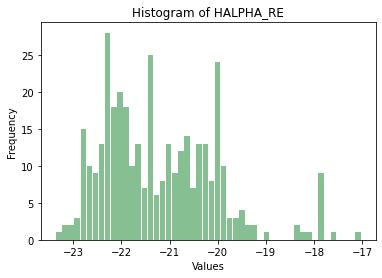

In [160]:
import matplotlib.pyplot as plt

# Assuming that 'df_ell' is your DataFrame and 'HALPHA_RE' is the column for which you want to plot histogram
df['M_r'].hist(bins=50, grid=False, color='#86bf91', rwidth=0.9)

plt.title('Histogram of HALPHA_RE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Data Cleaning
- Only take values with error <5%?
- Delete duplicate rows

- Find a way to estimate Mstar to get more data. Compare the accuracy. 

In [40]:
def Mstar_approximator_f(g_i, Mi, k =0.4):
    Mstar_approx = 1.15 + 0.70*g_i - k*Mi
    return Mstar_approx

## Farrel-Jackson Relation Plot

In [261]:
def linear_f(x, m, b):
    return m*x+b

def fits_f(x_data, y_data, estimate):
    """
    Fit a linear model to the provided data using curve_fit from scipy.optimize.

    Parameters:
    x_data (array-like): Independent variable data.
    y_data (array-like): Dependent variable data.
    estimate (list): Initial guess for the parameters of the linear model [slope, intercept].

    Returns:
    x_fits (array): Independent variable values for the fitted line.
    y_fits (array): Dependent variable values for the fitted line.
    [m, b] (list): Fitted parameters, where m is the slope and b is the intercept of the linear model.
    """
    # Use curve_fit function from scipy.optimize to fit data to a linear function
    popt, pcov = curve_fit(linear_f, x_data, y_data, p0=estimate)
    m, b = popt

    # Generate x and y values for best fit line.
    xmin = x_data.min()
    xmax = x_data.max()
    x_fits = np.linspace(x_min-0.1*np.abs(x_min), x_max+0.1*np.abs(x_max), 1000)
    y_fits = linear_f(x_fits, m, b)

    return x_fits, y_fits, [m, b]

def plot_confidence_interval(x_data, y_data, label, color=None):
    """
    Plots a confidence interval for a linear regression model. This is used to calculate the uncertainty in slope
    and y-intercept.

    Args:
        x_data (array-like): Independent variable data.
        y_data (array-like): Dependent variable data.
        label (str): Label for the confidence interval plot.
        color (str): Colour for the confidence interval plot.

    Returns:
        Tuple[float, float]: The uncertainty in the slope (m_unc) and intercept (b_unc) of the regression line.
    """
    # Find the minimum and maximum x values in the data. Then add a constant term to the x_data for regression
    x_min = x_data.min()
    x_max = x_data.max()
    x_with_const = sm.add_constant(x_data)
    
    # Generate a range of x values for the confidence interval
    x_linspace = np.linspace(x_min-0.1*np.abs(x_min), x_max+0.1*np.abs(x_max), 500)
    x_linspace_with_const = sm.add_constant(x_linspace)
    
    # Fit a linear regression model to the data
    model_ci = sm.OLS(y_data, x_with_const).fit()
    
    # Get predictions and confidence intervals for the regression. Snake_case "ci" for confidence interval"
    predictions_ci = model_ci.get_prediction(x_linspace_with_const)
    conf_interval = predictions_ci.conf_int()
    lower_bound_ci = conf_interval[:, 0]
    upper_bound_ci = conf_interval[:, 1]
    
    # Plot the confidence interval
    plt.fill_between(x_linspace, lower_bound_ci, upper_bound_ci, color=color, alpha=0.1, label=label)
    
    # Calculate uncertainty in slope and intercept. Snake_case "lb" for lower bound; "ub" for upper bound.
    # These are points on the confidence intervals used to calculate uncertainty bounds.
    point1 = [x_linspace[0], lower_bound_ci[0]]
    point2 = [x_linspace[-1], upper_bound_ci[-1]]
    point3 = [x_linspace[0], upper_bound_ci[0]]
    point4 = [x_linspace[-1], lower_bound_ci[-1]]
    
    slope_lb = (lower_bound_ci[-1] - upper_bound_ci[0]) / (x_linspace[-1] - x_linspace[0])
    slope_ub = (upper_bound_ci[-1] - lower_bound_ci[0]) / (x_linspace[-1] - x_linspace[0])
    slope_uncertainty = np.abs(slope_lb - slope_ub) / 2
    
    intercept_lb = point2[1] - slope_ub * point2[0]
    intercept_ub = point4[1] - slope_lb * point4[0]
    intercept_uncertainty = np.abs(intercept_lb - intercept_ub) / 2
    
    return slope_uncertainty, intercept_uncertainty

def z_to_d(z, z_err=0, units='Mpc'):
    """Converts redshift (z) to distance (d) in various units.
    Args:
        z (float): Redshift value.
        z_err (float): Error in redshift value (default is 0).
        units (str): Unit for the output distance ('ly', 'km', or 'Mpc', default is 'Mpc').

    Returns:
        tuple: A tuple containing the converted distance (d) and its error (d_err) in the specified units.
    """
    c = 299792458 * 1e-3  # Speed of light in km/s
    H_0 = 68.3  # Hubble's Constant in km/s/Mpc
    H_0_err = 1.5  # Hubble's Constant error in km/s/Mpc
    
    # Used when converting Mpc to other units
    conversion_factors = {
        'ly': 3.262e+6,
        'km': 3.086e+22,
        'Mpc': 1.0  
    }
    
    if units not in conversion_factors:
        raise ValueError("Not a valid unit. Try any of 'Mpc', 'ly', or 'km'.")
    
    conversion_factor = conversion_factors[units]
    d = c * z / H_0 * conversion_factor
    d_err = np.sqrt((z_err * c / H_0 * conversion_factor) ** 2 + (H_0_err * c * z / H_0 ** 2 * conversion_factor) ** 2)  # Errors of z and H_0 are treated independently.
    
    return d, d_err

def apply_custom_style(title, xlabel, ylabel, style=1):
    """
    Apply a custom style to a Matplotlib plot.
    """
    if style == 1:
        # Set the ticks
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.title(title, fontsize=16)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

        # Add gridlines
        plt.grid(True, linestyle='--', alpha=0.6) # major gridlines
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1) # minor gridlines
    else:
        warnings.warn(f"Style = {style} is not an option. Choosing default style = 1.", UserWarning)
        style = 1

def plot_features(x_data, y_data, group_col=None, best_fit=True, cinterval=True, residuals=True):
    """
    Generate scatter plots with colored data points and best fit lines for unique values in a mask column.
    Features include
        - scatter plot of x_data and y_data
        - line of best fit
        - 95% confidence interval of linear regression.

    Parameters:
    - x_data (array-like): X-axis data.
    - y_data (array-like): Y-axis data.
    - mask_col (array-like, optional): Column to group data by unique values.
    - best_fit (boolean, optional): True to display best fit line. False otherwise. Defaults True.
    - cinterval (boolean, optional): True to display 95% confidence interval. False otherwise. Defaults True.
    - cinterval (boolean, optional): True to return residuals of best fit line. False otherwise. Defaults True.
    """
    values = group_col.unique()
    colors = ['b', 'r', 'g']
    residuals_dict = {}
    
    for i, value in enumerate(values):
        mask = group_col == value # This mask is used to filter out certain data to create groups.
        count = sum(mask)
        plt.scatter(x_data[mask], y_data[mask], s=20, color=colors[i], alpha=0.4, edgecolors='k', linewidths=0.5, label=f'{value} (N={count})')
        
        # Plot the confidence interval
        if cinterval == True:
            # Fit the data for TYPE == 0 and plot the confidence interval
            m_unc, b_unc = plot_confidence_interval(x_data[mask], y_data[mask], f'95% Confidence Interval ({value})', color=colors[i])
        
        # Fit the data and plot the best fit line
        if best_fit == True:
            x_fit, y_fit, opt = fits_f(x_data[mask], y_data[mask], [1, 4])
            plt.plot(x_fit, y_fit, label=f'Line of Best Fit ({value}):\n $y=({opt[0]:.2f}\pm{m_unc:.2f})x+({opt[1]:.2f}\pm{b_unc:.2f})$', color=colors[i], linestyle='--')
        
        if residuals == True:
            residual_y = y_data[mask] - linear_f(x_data[mask], opt[0], opt[1])
            residual_x = x_data[mask]
            residuals_dict[value] = [residual_x, residual_y]
    
    return residuals_dict

def plot_residuals(residuals, xlabel, ylabel, filename):
    """
    Display residual plots using a dictionary of residuals.

    Parameters:
    - residuals (dict): A dictionary where keys represent plot labels, and values are 2D arrays of residual data.
    - xlabel (str): Label for the x-axis of the residual plots.
    - ylabel (str): Label for the y-axis of the residual plots.
    - filename (str): File to save plot to (without file extension)
    """
    colors = ['b', 'r', 'g']
    num_plots = len(residuals)
    
    # Iterate through the residuals dictionary
    for i, (key, values) in enumerate(residuals.items()):
        residuals_x = values[0]
        residuals_y = values[1]
        
        # Calculate residual statistics
        mean_res = np.mean(residuals_y)
        max_res = np.max(residuals_y)
        min_res = np.min(residuals_y)
        
        # Create a subplot for each set of residuals
        plt.subplot(num_plots, 1, i+1)  # Create the top subplot
        plt.scatter(residuals_x, residuals_y, s=20, color=colors[i], alpha=0.6, edgecolors='k', linewidths=0.5)
        plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
        plt.title(f'Residual Plot for ({key})', fontsize=14)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel('Residuals of ' + ylabel, fontsize=9)
        
        # Add residual statistics to the legend
        plt.legend([f"Mean: {mean_res:.2f}\nMax: {max_res:.2f}\nMin: {min_res:.2f}"],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, handlelength=0)
        
        # Add gridlines
        plt.grid(True, linestyle='--', alpha=0.6) # major gridlines
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1) # minor gridlines
               
    plt.tight_layout()  # Ensure proper spacing between subplots
    
    plt.savefig(filename + '.png', dpi=300, bbox_inches='tight')
    plt.show()

## Faber-Jackson Relation

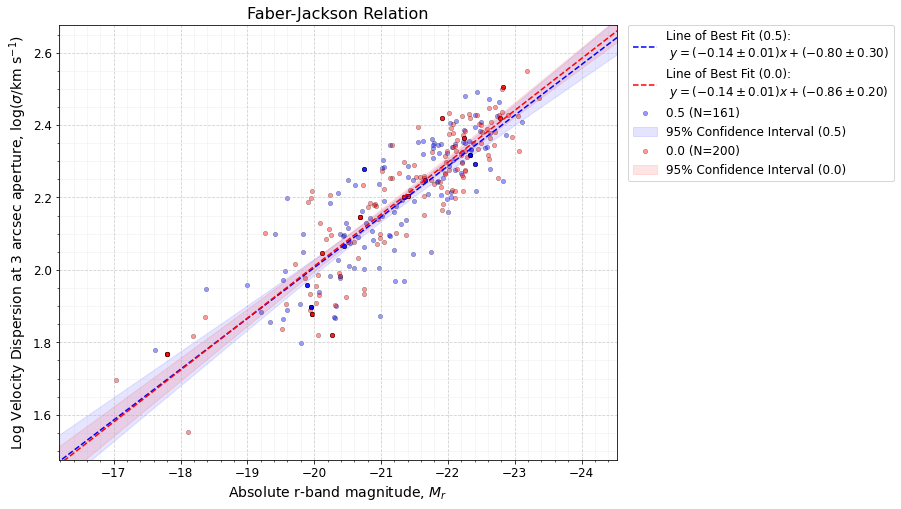

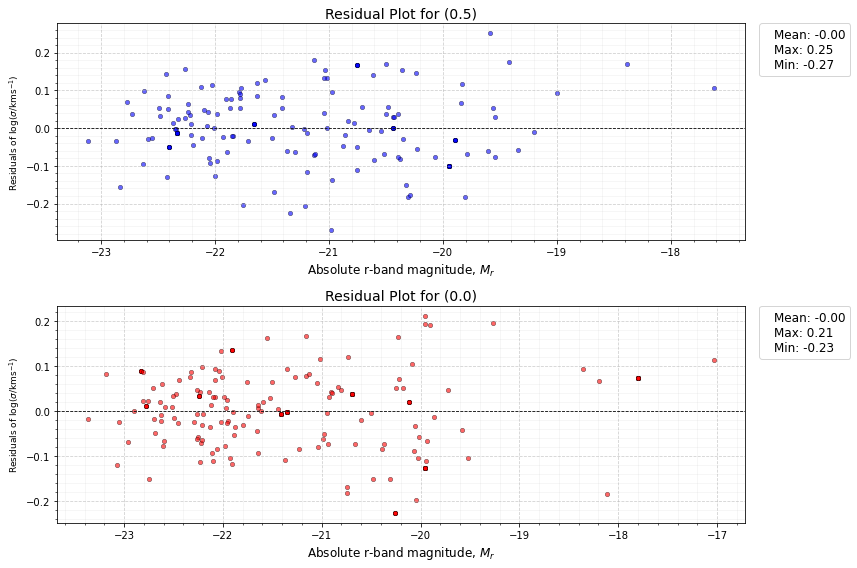

In [264]:
# Define constants
y_data = np.log10(df['SIGMA_3_ARCSECOND'])
x_data = df['M_r']
title = 'Faber-Jackson Relation'
xlabel = 'Absolute r-band magnitude, $M_r$'
ylabel = 'Log Velocity Dispersion at 3 arcsec aperture, $\log(\sigma / \mathrm{km\ s}^{-1})$'

# Create a figure
plt.figure(figsize=(10, 8))

# Plot the features: data points, line of best fit, and 95% confidence interval grouping by df['TYPE']
residuals = plot_features(x_data, y_data, df['TYPE'], residuals=True)

# Set the custom style
apply_custom_style(title, xlabel, ylabel)   

# Set the limits
y_min = min(y_data)
y_max = max(y_data)
x_min = min(x_data)
x_max = max(x_data)
plt.xlim(x_min-0.05*np.abs(x_min), x_max+0.05*np.abs(x_max))
plt.ylim(y_min-0.05*np.abs(y_min), y_max+0.05*np.abs(y_max))

# Invert x-axis
plt.gca().invert_xaxis()

# Save and display the plot
plt.savefig('faber_jackson_relation.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a new figure for residuals
plt.figure(figsize=(12, 8))

# Plot residuals.
plot_residuals(residuals, xlabel, ylabel=r"log($\sigma / \mathrm{km s}^{-1}$)", filename='faber_jackson_residuals')


## MASS v DISPERSION (1)

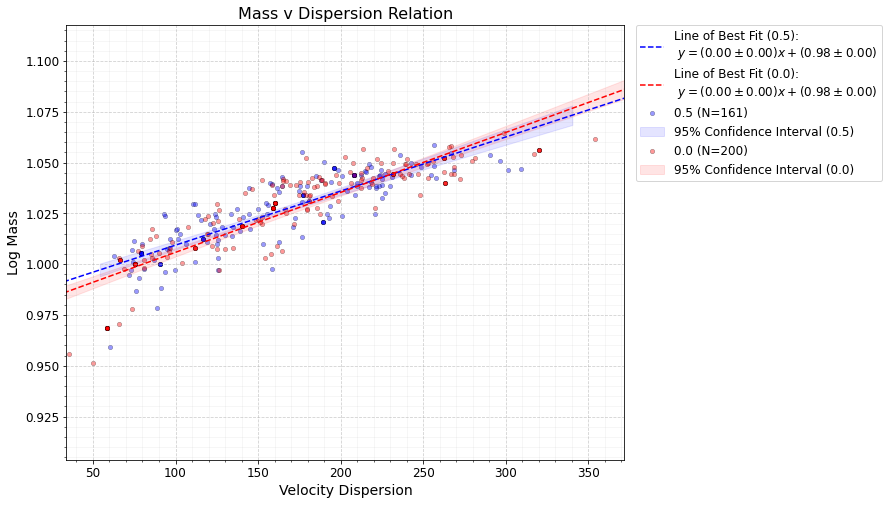

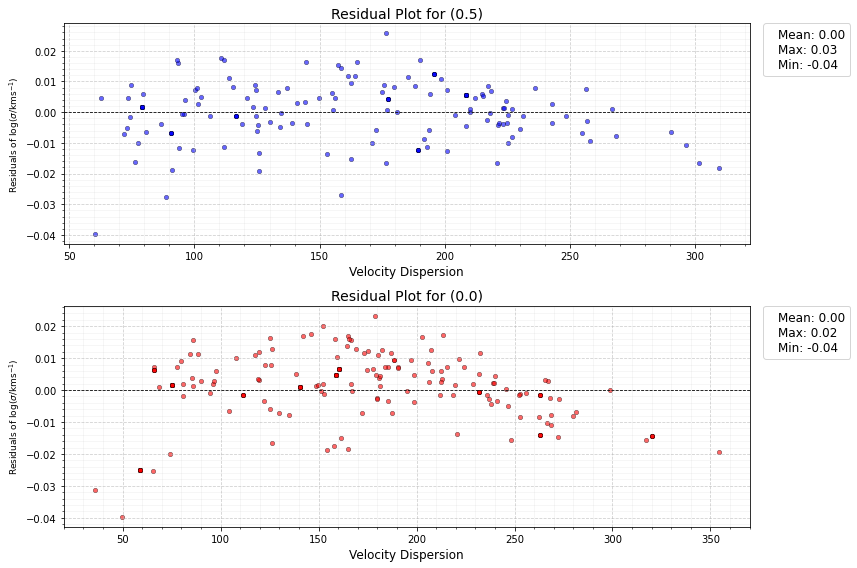

In [267]:
# Define constants
y_data = np.log10(df['Mstar'])
x_data = df['SIGMA_3_ARCSECOND']
title = 'Mass v Dispersion Relation'
xlabel = 'Velocity Dispersion'
ylabel = 'Log Mass'

# Create a figure
plt.figure(figsize=(10, 8))

# Plot the features: data points, line of best fit, and 95% confidence interval grouping by df['TYPE']
residuals = plot_features(x_data, y_data, df['TYPE'], residuals=True)

# Set the custom style
apply_custom_style(title, xlabel, ylabel)   

# Set the limits
y_min = min(y_data)
y_max = max(y_data)
x_min = min(x_data)
x_max = max(x_data)
plt.xlim(x_min-0.05*np.abs(x_min), x_max+0.05*np.abs(x_max))
plt.ylim(y_min-0.05*np.abs(y_min), y_max+0.05*np.abs(y_max))

# Save and display the plot
plt.savefig('mass_disp_relation.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a new figure for residuals
plt.figure(figsize=(12, 8))

# Plot residuals.
plot_residuals(residuals, xlabel, ylabel=r"log($\sigma / \mathrm{km s}^{-1}$)", filename='mass_disp_residuals')


## MASS v. DISPERSION

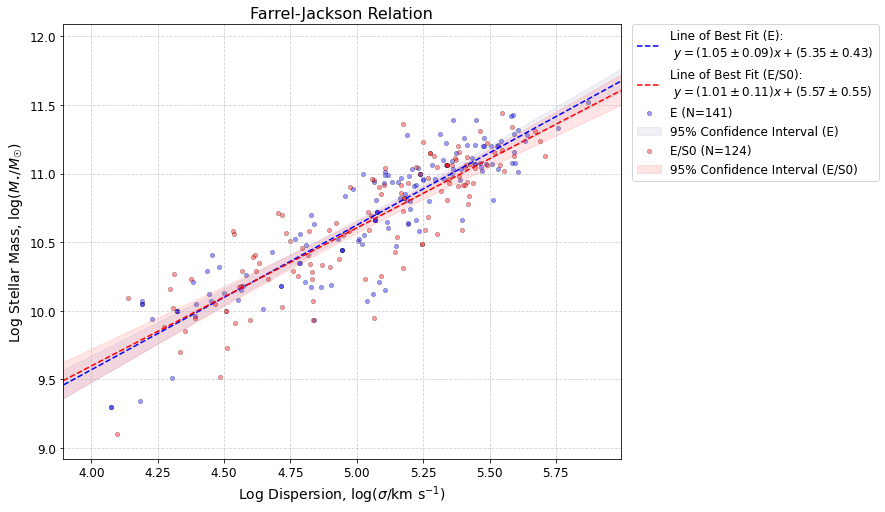

In [166]:
mass = df_ell['Mstar']
disp = np.log(df_ell['SIGMA_3_ARCSECOND'])

# Create a figure
plt.figure(figsize=(10, 8))

# Filter data for TYPE == 0 and plot it
mask_type_0 = df_ell['TYPE'] == 0
count_0 = len(disp[mask_type_0])
plt.scatter(disp[mask_type_0], mass[mask_type_0], s=20, c='b', alpha=0.4, edgecolors='k', linewidths=0.5, label=f'E (N={count_0})')

# Fit the data for TYPE == 0 and plot the confidence interval
x_fit_0, y_fit_0, opt_0 = fits_f(disp[mask_type_0], mass[mask_type_0], [1, 4])
m_unc_0, b_unc_0 = plot_confidence_interval(disp[mask_type_0], mass[mask_type_0], '95% Confidence Interval (E)', '#7075b5')

# Filter data for TYPE == 0.5 and plot it
mask_type_0_5 = df_ell['TYPE'] == 0.5
count_0_5 = len(disp[mask_type_0_5])
plt.scatter(disp[mask_type_0_5], mass[mask_type_0_5], s=20, c='r', alpha=0.4, edgecolors='k', linewidths=0.5, label=f'E/S0 (N={count_0_5})')

# Fit the data for TYPE == 0.5 and plot the confidence interval
x_fit_0_5, y_fit_0_5, opt_0_5 = fits_f(disp[mask_type_0_5], mass[mask_type_0_5], [1, 4])
m_unc_0_5, b_unc_0_5 = plot_confidence_interval(disp[mask_type_0_5], mass[mask_type_0_5], '95% Confidence Interval (E/S0)', 'red')

# Plot best fit lines with uncertainties for both types
plt.plot(x_fit_0, y_fit_0, '--b', label=f'Line of Best Fit (E):\n $y=({opt_0[0]:.2f}\pm{m_unc_0:.2f})x+({opt_0[1]:.2f}\pm{b_unc_0:.2f})$')
plt.plot(x_fit_0_5, y_fit_0_5, '--r', label=f'Line of Best Fit (E/S0):\n $y=({opt_0_5[0]:.2f}\pm{m_unc_0_5:.2f})x+({opt_0_5[1]:.2f}\pm{b_unc_0_5:.2f})$')

# Plot Styles
plt.title('Farrel-Jackson Relation', fontsize=16)
plt.xlabel('Log Dispersion, $\log(\sigma \mathrm{ }/\mathrm{ }  \mathrm{km\ s}^{-1})$', fontsize=14)
plt.ylabel('Log Stellar Mass, $\log(M_{\star}/M_{☉})$', fontsize=14)

plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(min(x_fit_0_5), max(x_fit_0_5))
y_min = min(min(y_fit_0_5), min(y_fit_0), min(mass))
y_max = max(max(y_fit_0_5), max(y_fit_0), max(mass))
plt.ylim(y_min-0.02*y_min, y_max+0.02*y_max)

# Save Plot
plt.savefig('farrel_jackson_relation.png', dpi=300, bbox_inches='tight')
plt.show()

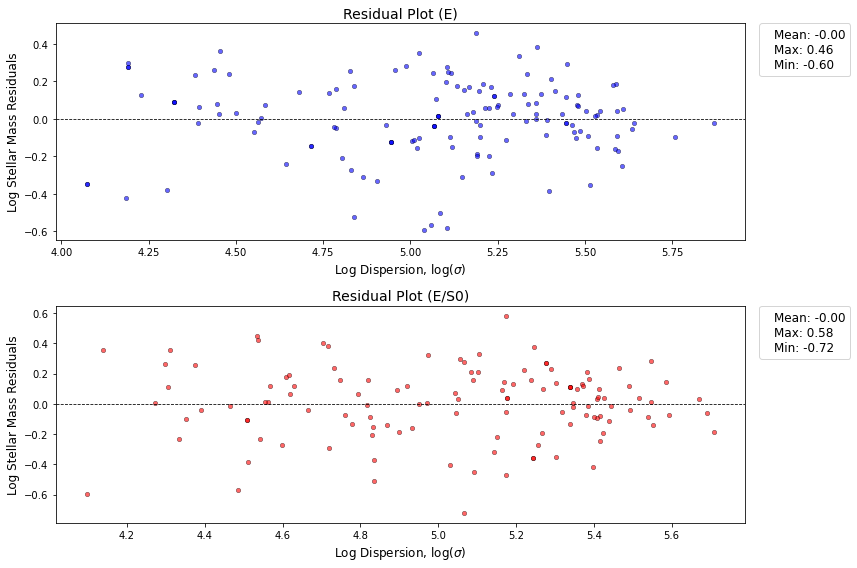

In [33]:
plt.figure(figsize=(12, 8))

# Calculate Residuals
residuals_type_0 = mass[mask_type_0] - linear_f(disp[mask_type_0], opt_0[0], opt_0[1])
residuals_type_0_5 = mass[mask_type_0_5] - linear_f(disp[mask_type_0_5], opt_0_5[0], opt_0_5[1])

# Calculate residual statistics
mean_residue_type_0 = np.mean(residuals_type_0)
max_residue_type_0 = np.max(residuals_type_0)
min_residue_type_0 = np.min(residuals_type_0)

mean_residue_type_0_5 = np.mean(residuals_type_0_5)
max_residue_type_0_5 = np.max(residuals_type_0_5)
min_residue_type_0_5 = np.min(residuals_type_0_5)

# Create residual plots
plt.subplot(2, 1, 1)  # Create the top subplot
plt.scatter(disp[mask_type_0], residuals_type_0, s=20, c='b', alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title('Residual Plot (E)', fontsize=14)
plt.xlabel('Log Dispersion, $\log(\sigma)$', fontsize=12)
plt.ylabel('Log Stellar Mass Residuals', fontsize=12)

# Add residual statistics to the legend
plt.legend([f"Mean: {mean_residue_type_0:.2f}\nMax: {max_residue_type_0:.2f}\nMin: {min_residue_type_0:.2f}"],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, handlelength=0)

plt.subplot(2, 1, 2)  # Create the bottom subplot
plt.scatter(disp[mask_type_0_5], residuals_type_0_5, s=20, c='r', alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title('Residual Plot (E/S0)', fontsize=14)
plt.xlabel('Log Dispersion, $\log(\sigma)$', fontsize=12)
plt.ylabel('Log Stellar Mass Residuals', fontsize=12)

# Add residual statistics to the legend
plt.legend([f"Mean: {mean_residue_type_0_5:.2f}\nMax: {max_residue_type_0_5:.2f}\nMin: {min_residue_type_0_5:.2f}"],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, handlelength=0)

plt.tight_layout()  # Ensure proper spacing between subplots

# You can also save the figure to a file if needed
plt.savefig('farrel_jackson_residuals.png', dpi=300, bbox_inches='tight')
plt.show()


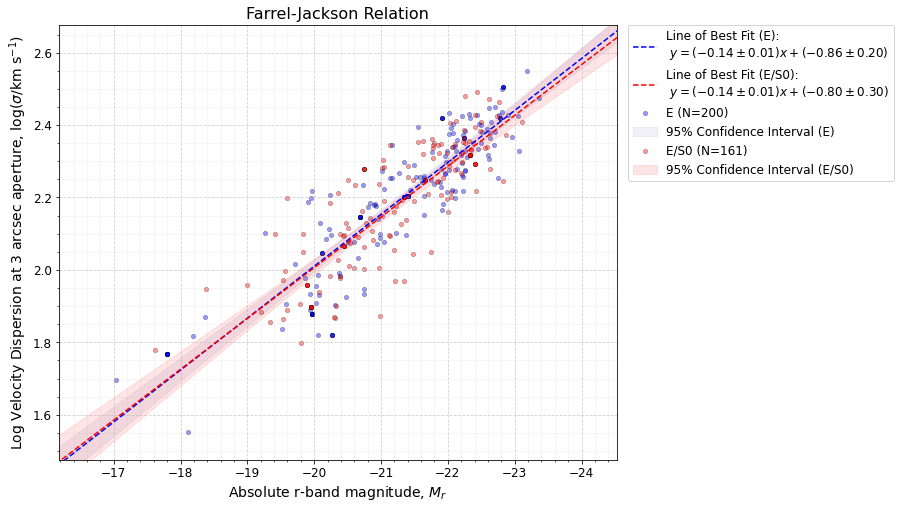

In [202]:
y_data = np.log10(df['SIGMA_3_ARCSECOND'])
x_data = df['M_r']
title = 'Farrel-Jackson Relation'
xlabel = 'Absolute r-band magnitude, $M_r$'
ylabel = 'Log Velocity Dispersion at 3 arcsec aperture, $\log(\sigma / \mathrm{km\ s}^{-1})$'
color1 = 'r'
color2 = 'b'

# Create a figure
plt.figure(figsize=(10, 8))

def plot_features(x_data, y_data, group_col):
    values = group_col.unique()
    for value in values:
        mask = mask_col == value
        count = sum(mask)
        plt.scatter(x_data[mask], y_data[mask], s=20, alpha=0.4, edgecolors='k', linewidths=0.5, label=f'{value} (N={count})')

        # Fit the data for TYPE == 0 and plot the confidence interval
        x_fit, y_fit, opt = fits_f(x_data[mask], y_data[mask], [1, 4])
        m_unc, b_unc = plot_confidence_interval(x_data[mask_type], y_data[mask_type], '95% Confidence Interval (E)', '#7075b5')

        # Plot best fit lines with uncertainties for both types
        plt.plot(x_fit, y_fit, label=f'Line of Best Fit ({value}):\n $y=({opt[0]:.2f}\pm{m_unc:.2f})x+({opt[1]:.2f}\pm{b_unc:.2f})$')
       
        
# Filter data for TYPE == 0 and plot it
mask_type_0 = df['TYPE'] == 0
count_0 = len(x_data[mask_type_0])
plt.scatter(x_data[mask_type_0], y_data[mask_type_0], s=20, c='b', alpha=0.4, edgecolors='k', linewidths=0.5, label=f'E (N={count_0})')

# Fit the data for TYPE == 0 and plot the confidence interval
x_fit_0, y_fit_0, opt_0 = fits_f(x_data[mask_type_0], y_data[mask_type_0], [1, 4])
m_unc_0, b_unc_0 = plot_confidence_interval(x_data[mask_type_0], y_data[mask_type_0], '95% Confidence Interval (E)', '#7075b5')

# Filter data for TYPE == 0.5 and plot it
mask_type_0_5 = df['TYPE'] == 0.5
count_0_5 = len(x_data[mask_type_0_5])
plt.scatter(x_data[mask_type_0_5], y_data[mask_type_0_5], s=20, c='r', alpha=0.4, edgecolors='k', linewidths=0.5, label=f'E/S0 (N={count_0_5})')

# Fit the data for TYPE == 0.5 and plot the confidence interval
x_fit_0_5, y_fit_0_5, opt_0_5 = fits_f(x_data[mask_type_0_5], y_data[mask_type_0_5], [1, 4])
m_unc_0_5, b_unc_0_5 = plot_confidence_interval(x_data[mask_type_0_5], y_data[mask_type_0_5], '95% Confidence Interval (E/S0)', 'red')

# Plot best fit lines with uncertainties for both types
plt.plot(x_fit_0, y_fit_0, '--b', label=f'Line of Best Fit (E):\n $y=({opt_0[0]:.2f}\pm{m_unc_0:.2f})x+({opt_0[1]:.2f}\pm{b_unc_0:.2f})$')
plt.plot(x_fit_0_5, y_fit_0_5, '--r', label=f'Line of Best Fit (E/S0):\n $y=({opt_0_5[0]:.2f}\pm{m_unc_0_5:.2f})x+({opt_0_5[1]:.2f}\pm{b_unc_0_5:.2f})$')

# Plot Styles
plt.title(title, fontsize=16)
plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)

plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

y_min = min(y_data)
y_max = max(y_data)
x_min = min(x_data)
x_max = max(x_data)
plt.xlim(x_min-0.05*np.abs(x_min), x_max+0.05*np.abs(x_max))
plt.ylim(y_min-0.05*np.abs(y_min), y_max+0.05*np.abs(y_max))

# Add major gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Add minor gridlines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

plt.gca().invert_xaxis()

# Save Plot
plt.savefig('faber_jackson_relation.png', dpi=300, bbox_inches='tight')
plt.show()

In [238]:
residuals[0.5][1]

0      0.012856
2      0.047887
3      0.108189
4      0.179531
8     -0.050819
         ...   
533   -0.000705
534   -0.000705
540    0.039183
543   -0.035465
544   -0.069680
Length: 161, dtype: float64

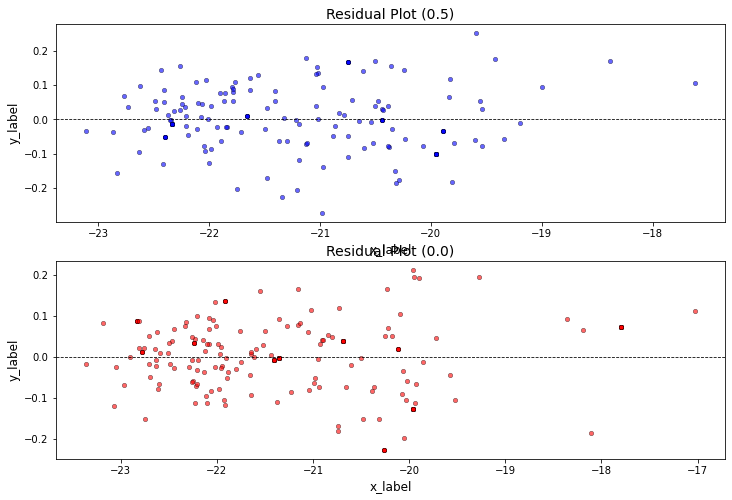

In [ ]:
plt.figure(figsize=(12, 8))

def plot_residuals()

# Calculate Residuals
residuals_type_0 = mass[mask_type_0] - linear_f(disp[mask_type_0], opt_0[0], opt_0[1])
residuals_type_0_5 = mass[mask_type_0_5] - linear_f(disp[mask_type_0_5], opt_0_5[0], opt_0_5[1])

# Calculate residual statistics
mean_residue_type_0 = np.mean(residuals_type_0)
max_residue_type_0 = np.max(residuals_type_0)
min_residue_type_0 = np.min(residuals_type_0)

mean_residue_type_0_5 = np.mean(residuals_type_0_5)
max_residue_type_0_5 = np.max(residuals_type_0_5)
min_residue_type_0_5 = np.min(residuals_type_0_5)

# Create residual plots
plt.subplot(2, 1, 1)  # Create the top subplot
plt.scatter(disp[mask_type_0], residuals_type_0, s=20, c='b', alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title('Residual Plot (E)', fontsize=14)
plt.xlabel('Log Dispersion, $\log(\sigma)$', fontsize=12)
plt.ylabel('Log Stellar Mass Residuals', fontsize=12)

# Add residual statistics to the legend
plt.legend([f"Mean: {mean_residue_type_0:.2f}\nMax: {max_residue_type_0:.2f}\nMin: {min_residue_type_0:.2f}"],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, handlelength=0)

plt.subplot(2, 1, 2)  # Create the bottom subplot
plt.scatter(disp[mask_type_0_5], residuals_type_0_5, s=20, c='r', alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title('Residual Plot (E/S0)', fontsize=14)
plt.xlabel('Log Dispersion, $\log(\sigma)$', fontsize=12)
plt.ylabel('Log Stellar Mass Residuals', fontsize=12)

# Add residual statistics to the legend
plt.legend([f"Mean: {mean_residue_type_0_5:.2f}\nMax: {max_residue_type_0_5:.2f}\nMin: {min_residue_type_0_5:.2f}"],
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, handlelength=0)

plt.tight_layout()  # Ensure proper spacing between subplots

# You can also save the figure to a file if needed
plt.savefig('farrel_jackson_residuals.png', dpi=300, bbox_inches='tight')
plt.show()


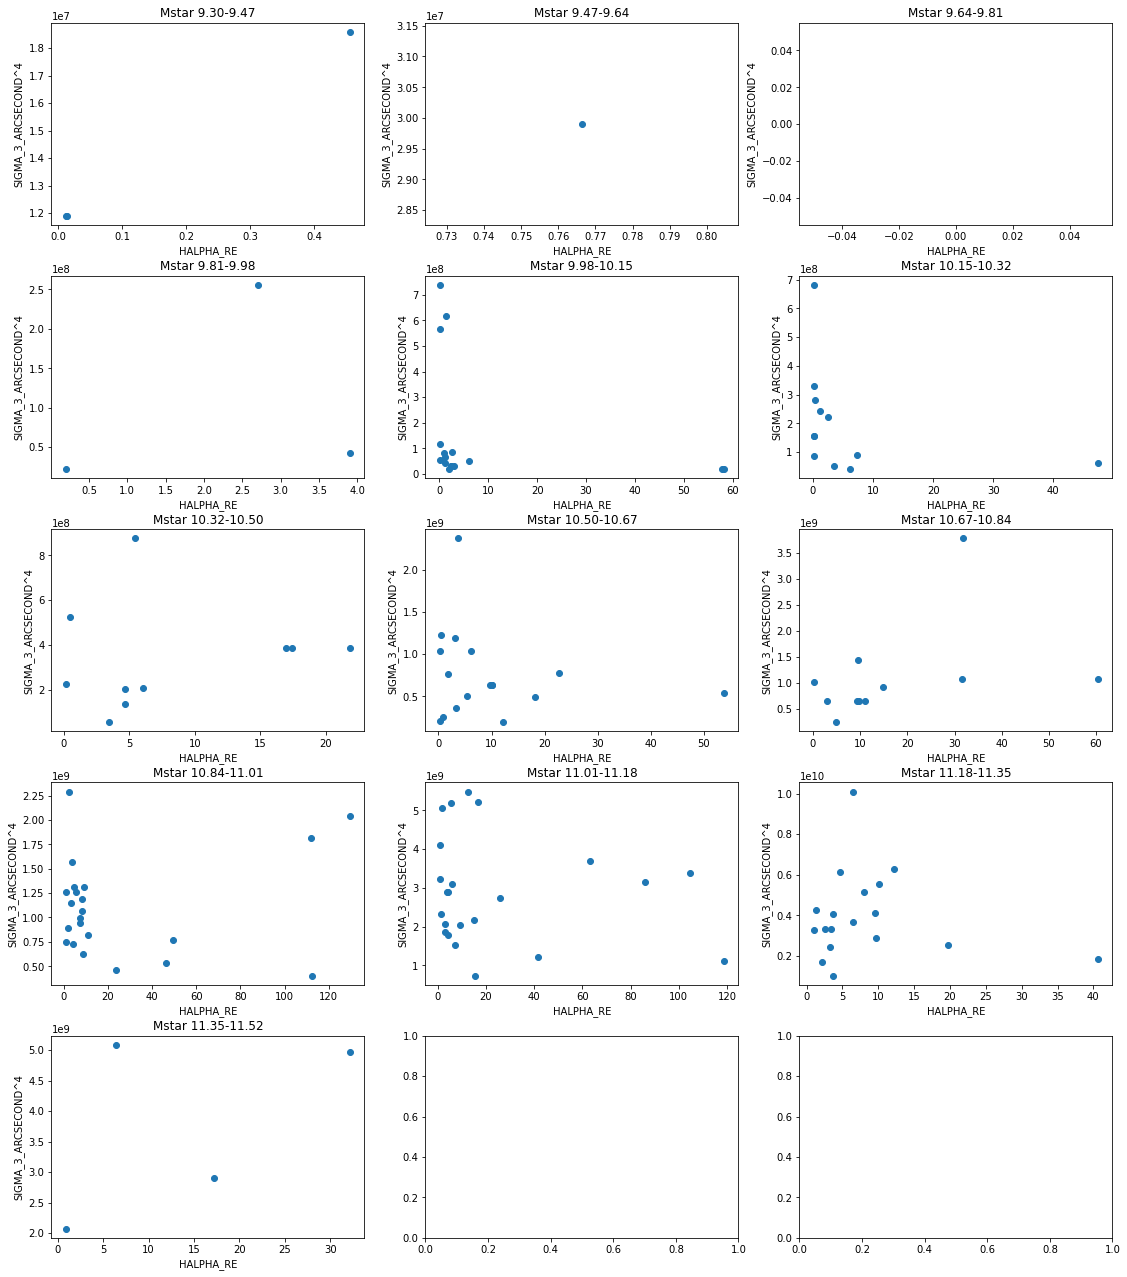

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the Mstar ranges
min_mass = df_ell['Mstar'].min()
max_mass = df_ell['Mstar'].max()
step = (max_mass - min_mass) / 13
mstar_ranges = np.arange(min_mass, max_mass + 0.001, step)

# Create subplots with a larger figure size and adjusted tight_layout
fig, axes = plt.subplots(5, 3, figsize=(16, 18))  # Increase the height (second argument)
fig.tight_layout(pad=3.0)  # Reduce the padding between subplots

for i in range(len(mstar_ranges) - 1):
    mstar_min, mstar_max = mstar_ranges[i], mstar_ranges[i + 1]

    # Filter data for the current Mstar range
    filtered_data = df_ell[(df_ell['Mstar'] >= mstar_min) & (df_ell['Mstar'] < mstar_max)]

    # Scatter plot
    ax = axes[i // 3, i % 3]
    ax.scatter(filtered_data['HALPHA_RE'], filtered_data['SIGMA_3_ARCSECOND'] ** 4)
    ax.set_title(f'Mstar {mstar_min:.2f}-{mstar_max:.2f}')  # Adjusted formatting
    ax.set_xlabel('HALPHA_RE')
    ax.set_ylabel('SIGMA_3_ARCSECOND^4')

# Show the plots
plt.show()


In [13]:
df2

,ID,[Fe/H],wt,E(B-V),V_HB,(m-M)V,V_t,"M_V,t",U-B,B-V,V-R,V-I,spt,ellip
0,NGC 104,-0.72,10,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,G4,0.09
1,NGC 288,-1.32,3,0.03,15.44,14.84,8.09,-6.75,0.08,0.65,0.45,0.94,,
2,NGC 362,-1.26,5,0.05,15.44,14.83,6.4,-8.43,0.16,0.77,0.49,1.01,F9,0.01
3,Whiting 1,-0.7,1,0.03,18.18,17.49,15.03,-2.46,,,,,,
4,NGC 1261,-1.27,3,0.01,16.70,16.09,8.29,-7.8,0.13,0.72,0.45,0.93,F7,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,-1.65,5,0.06,16.05,15.50,6.47,-9.03,0.09,0.66,0.46,0.92,F4,0.11
153,NGC 7099,-2.27,4,0.03,15.10,14.64,7.19,-7.45,0.03,0.6,0.41,0.86,F3,0.01
154,Pal 12,-0.85,6,0.02,17.13,16.46,11.99,-4.47,0.34,1.07,,,,
155,Pal 13,-1.88,2,0.05,17.75,17.23,13.47,-3.76,0.11,0.76,,,,


In [85]:
# Load the data from CSV files
df2 = pd.read_csv("HarrisPartII.csv")
df3 = pd.read_csv("HarrisPartIII.csv")

# Create a new DataFrame combining selected columns
dfnew = pd.DataFrame({
    'ID2': df2['ID'],
    'ID3': df3['ID'],
    'Lum': df2['M_V,t'],
    'V_disp': df3['sig_v']
})

# Remove rows with empty 'Lum' values and NaN 'V_disp' values
dfnew = dfnew[~(dfnew['Lum'] == '     ')]
dfnew = dfnew[~dfnew['V_disp'].isna()]

# Convert 'Lum' column to numeric (if it's stored as strings)
dfnew['Lum'] = pd.to_numeric(dfnew['Lum'], errors='coerce')

# Sort the DataFrame by 'Lum' column in ascending order
dfnew = dfnew.sort_values(by='Lum', ascending=True)

# Display the 'Lum' column
dfnew['Lum']


28    -10.26
133    -9.98
95     -9.63
0      -9.42
12     -9.42
       ...  
146    -5.61
37     -5.17
45     -4.80
105    -4.75
155    -3.76
Name: Lum, Length: 62, dtype: float64

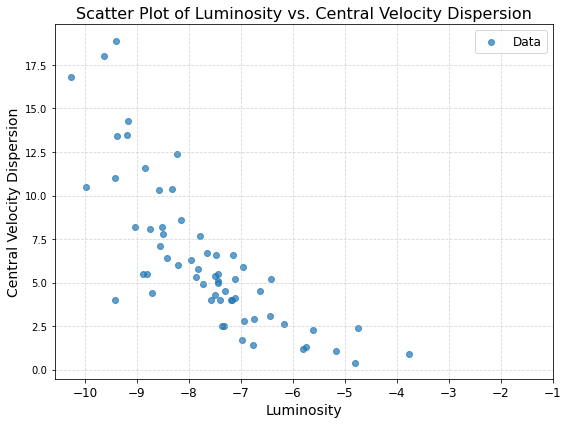

In [87]:
import matplotlib.pyplot as plt
import numpy as np

v_disp = dfnew['V_disp']
lum = dfnew['Lum']

# Create a scatter plot with custom styling
plt.figure(figsize=(8, 6))
plt.scatter(lum, v_disp, marker='o', alpha=0.7, label='Data')

plt.ylabel('Central Velocity Dispersion', fontsize=14)
plt.xlabel('Luminosity', fontsize=14)
plt.title('Scatter Plot of Luminosity vs. Central Velocity Dispersion', fontsize=16)

# Customize the x-axis ticks to be integers
plt.xticks(np.arange(-10, 0, 1), fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
